# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [12]:
# you are free to use any package you deem fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Dataset

In [13]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

# structure and type of data
print(type(X))
print(X.shape, Y.shape)


<class 'numpy.ndarray'>
(500, 2) (500,)


Text(0, 0.5, 'Y')

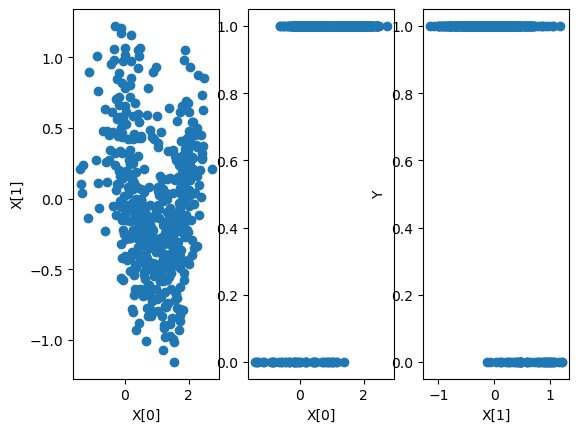

In [28]:
# visualization of data
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1])
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.subplot(1,3,2)
plt.scatter(X[:,0],Y)
plt.xlabel('X[0]')
plt.subplot(1,3,3)
plt.scatter(X[:,1],Y)
plt.xlabel('X[1]')
plt.ylabel('Y')

In [25]:
# 3d plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], Y)
ax.set_xlabel('X label') # 画出坐标轴
ax.set_ylabel('Y label')
ax.set_zlabel('Z label')
plt.show()

<Figure size 640x480 with 0 Axes>

## Training

In [38]:
# select model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [36]:

# create dataset (train, test, cross_validation)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


In [52]:
# train model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)

RandomForestClassifier()

## Testing / Optimization

In [57]:
# classification report
pred = rfc.predict(X_test)
print(metrics.classification_report(pred,Y_test))

# prediction accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(Y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.97      0.95      0.96        87

    accuracy                           0.93       100
   macro avg       0.84      0.86      0.85       100
weighted avg       0.93      0.93      0.93       100

Accuracy: 0.93


In [61]:
# optimization: grid optimization for the param n_estimators

from sklearn.model_selection import GridSearchCV
n_estimators = range(100,500,15)
hyper = {'n_estimators':n_estimators
        , }

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)

gd.fit(X_train,Y_train)

# output the highest accuracy
print(gd.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0.9633333333333333


## Performance Analysis

In [62]:
print(gd.best_estimator_)

RandomForestClassifier(n_estimators=115, random_state=0)


In [65]:
best_params = gd.best_params_
best_classifier = gd.best_estimator_

# redo the prediction with the best classifier
best_pred = best_classifier.predict(X_test)

In [66]:
print(metrics.classification_report(pred,Y_test))

# prediction accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(Y_test, best_pred)
print(f"Accuracy: {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.97      0.95      0.96        87

    accuracy                           0.93       100
   macro avg       0.84      0.86      0.85       100
weighted avg       0.93      0.93      0.93       100

Accuracy: 0.94


In [ ]:
# accuracy increases 0.01 :)